# Insights of Nifty 50 Index

In [1]:
#Loading file data
import pandas as pd
import numpy as np
df_data=pd.read_csv("/kaggle/input/nifty-indices-dataset/NIFTY 50.csv")
df_data.head()


,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [2]:
df_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'P/E',
       'P/B', 'Div Yield'],
      dtype='object')

In [3]:
#Data types of the Features
df_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Turnover     float64
P/E          float64
P/B          float64
Div Yield    float64
dtype: object

In [4]:
#Identifying the missing data
missing_data = df_data.isnull()
missing_data.head(5)


,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [5]:
#Identifying the number of missing data in all columns 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Date
False    5208
Name: Date, dtype: int64

Open
False    5208
Name: Open, dtype: int64

High
False    5208
Name: High, dtype: int64

Low
False    5208
Name: Low, dtype: int64

Close
False    5208
Name: Close, dtype: int64

Volume
False    5208
Name: Volume, dtype: int64

Turnover
False    5208
Name: Turnover, dtype: int64

P/E
False    5208
Name: P/E, dtype: int64

P/B
False    5208
Name: P/B, dtype: int64

Div Yield
False    5208
Name: Div Yield, dtype: int64



True means data is missing and false means data is not missing.
So data is missing in Volume and Turnover
.We will deal with the missing data by taking the average value of both th columns

In [6]:
#Averaging the volume
avg_vol = df_data["Volume"].astype("float").mean(axis=0)
print("Average Volume:", avg_vol)

Average Volume: 180371763.24980798


In [7]:
#Averaging the Turnover
avg_tur = df_data["Turnover"].astype("float").mean(axis=0)
print("Average Turnover:", avg_tur)

Average Turnover: 76004364823.3487


Replacing the missing values by taking the mean of the particular column

In [8]:
#Replacing the missing or nan value by the average value in volume column
df_data["Volume"].replace(np.nan, avg_vol, inplace=True)

In [9]:
#Replacing the missing or nan value by the average value in turnover column
df_data["Turnover"].replace(np.nan, avg_tur, inplace=True)

In [10]:
#Rechecking the missing values in the columns
missing_data = df_data.isnull()
missing_data.head(5) 

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 
    
#So there is no missing values now

Date
False    5208
Name: Date, dtype: int64

Open
False    5208
Name: Open, dtype: int64

High
False    5208
Name: High, dtype: int64

Low
False    5208
Name: Low, dtype: int64

Close
False    5208
Name: Close, dtype: int64

Volume
False    5208
Name: Volume, dtype: int64

Turnover
False    5208
Name: Turnover, dtype: int64

P/E
False    5208
Name: P/E, dtype: int64

P/B
False    5208
Name: P/B, dtype: int64

Div Yield
False    5208
Name: Div Yield, dtype: int64



In [12]:
#converting the data type of datetime from object to timestamp
df_data["Date"]= pd.to_datetime(df_data["Date"])
df_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Turnover            float64
P/E                 float64
P/B                 float64
Div Yield           float64
dtype: object

Adding column month for monthwise analysis And column year for yearwise analysis

In [13]:
df_data['month'] = df_data['Date'].dt.month
df_data['year'] = df_data['Date'].dt.year

In [14]:
df_data.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,month,year
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95,1,2000
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92,1,2000
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95,1,2000
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94,1,2000
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94,1,2000


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5208 non-null   datetime64[ns]
 1   Open       5208 non-null   float64       
 2   High       5208 non-null   float64       
 3   Low        5208 non-null   float64       
 4   Close      5208 non-null   float64       
 5   Volume     5208 non-null   int64         
 6   Turnover   5208 non-null   float64       
 7   P/E        5208 non-null   float64       
 8   P/B        5208 non-null   float64       
 9   Div Yield  5208 non-null   float64       
 10  month      5208 non-null   int64         
 11  year       5208 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 488.4 KB


In [16]:
df_data.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,month,year
count,5208.000000,5208.000000,5208.000000,5208.000000,5.208000e+03,5.208000e+03,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000
mean,5384.321544,5420.471553,5341.121678,5381.368654,1.803718e+08,7.600436e+10,20.320709,3.536444,1.428525,6.491359,2009.936060
std,3379.752344,3389.868427,3361.131560,3375.288932,1.636207e+08,7.156894e+10,4.519382,0.791935,0.397166,3.432289,6.042257
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000,1.000000,2000.000000
25%,2034.912500,2052.750000,2019.762500,2035.575000,7.934377e+07,3.094960e+10,17.200000,3.030000,1.190000,4.000000,2005.000000
50%,5159.550000,5206.650000,5104.000000,5158.000000,1.402677e+08,5.954680e+10,20.260000,3.455000,1.340000,7.000000,2010.000000
75%,8126.600000,8174.362500,8082.325000,8125.062500,2.066708e+08,8.876142e+10,23.170000,3.780000,1.540000,9.000000,2015.000000
max,13215.300000,13280.050000,13152.850000,13258.550000,1.811564e+09,7.852293e+11,36.460000,6.550000,3.180000,12.000000,2020.000000


Now lets view the correlation between all the columns

In [17]:
df_data.corr()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,month,year
Open,1.000000,0.999910,0.999875,0.999808,0.659006,0.753370,0.796420,0.017475,-0.421571,0.039071,0.965870
High,0.999910,1.000000,0.999825,0.999907,0.661676,0.755720,0.796591,0.018830,-0.422212,0.038785,0.966210
Low,0.999875,0.999825,1.000000,0.999897,0.655579,0.750550,0.796781,0.017006,-0.421654,0.039641,0.965596
Close,0.999808,0.999907,0.999897,1.000000,0.658689,0.753281,0.796942,0.018307,-0.422141,0.039469,0.965920
Volume,0.659006,0.661676,0.655579,0.658689,1.000000,0.921145,0.521740,-0.151491,-0.121898,0.028835,0.666324
Turnover,0.753370,0.755720,0.750550,0.753281,0.921145,1.000000,0.664041,-0.052611,-0.214250,0.038886,0.730753
P/E,0.796420,0.796591,0.796781,0.796942,0.521740,0.664041,1.000000,0.375178,-0.648394,0.015164,0.652819
P/B,0.017475,0.018830,0.017006,0.018307,-0.151491,-0.052611,0.375178,1.000000,-0.539129,-0.060772,-0.129282
Div Yield,-0.421571,-0.422212,-0.421654,-0.422141,-0.121898,-0.214250,-0.648394,-0.539129,1.000000,0.027598,-0.305616
month,0.039071,0.038785,0.039641,0.039469,0.028835,0.038886,0.015164,-0.060772,0.027598,1.000000,-0.011116


Now let's start visualizing all the data

In [18]:
# Importing all the Vizualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [19]:
df_data[["Volume", "Turnover"]].corr()

,Volume,Turnover
Volume,1.000000,0.921145
Turnover,0.921145,1.000000


We can view a positive relation between volume and turnover.
So we can view this in regression relation plot

(0.0, 842979213903.7732)

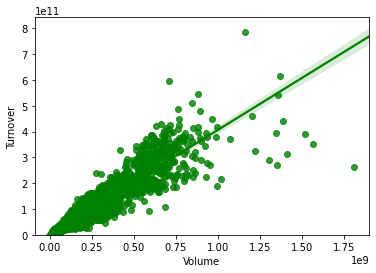

In [20]:
sns.regplot(x="Volume", y="Turnover",color='green', data=df_data,truncate=False)
plt.ylim(0,)

In [21]:
df_data[["Volume", "Div Yield"]].corr()

,Volume,Div Yield
Volume,1.000000,-0.121898
Div Yield,-0.121898,1.000000


We can view a negative relation between volume and Div Yield

(0.0, 3.3095)

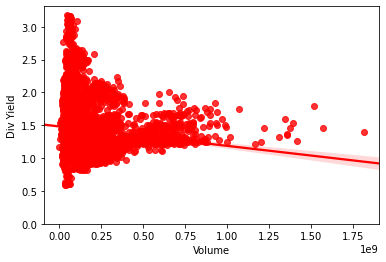

In [22]:
sns.regplot(x="Volume", y="Div Yield", color='r',data=df_data,truncate=False)
plt.ylim(0,)

In [23]:
df_data[["Turnover", "Div Yield"]].corr()

,Turnover,Div Yield
Turnover,1.00000,-0.21425
Div Yield,-0.21425,1.00000


The correlation between Turnover and Div Yield also shows a negative value

(0.0, 3.317978081352843)

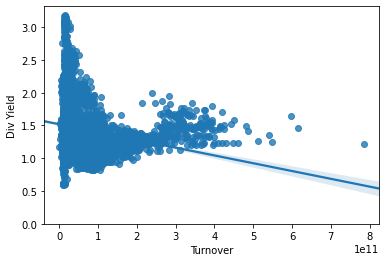

In [24]:
sns.regplot(x="Turnover", y="Div Yield",data=df_data,truncate=False)
plt.ylim(0,)

Now lets see how does the data varies monthly 

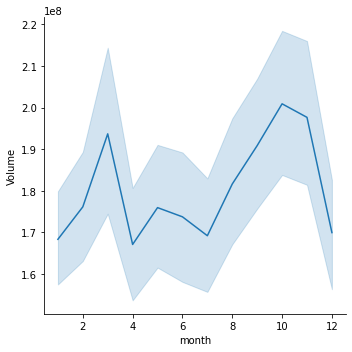

In [25]:
sns.relplot(x="month", y="Volume", kind="line", data=df_data)

The above plot shows that during the start of the year the volume shows a linear increase and falls mid-year and then again gains high volume

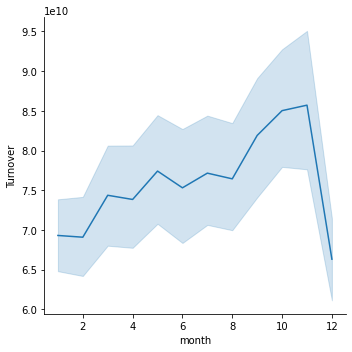

In [26]:
sns.relplot(x="month", y="Turnover", kind="line", data=df_data)

The above plot show the turnover variation over the period of year

Now lets visualize the data over the year from 2000-2020

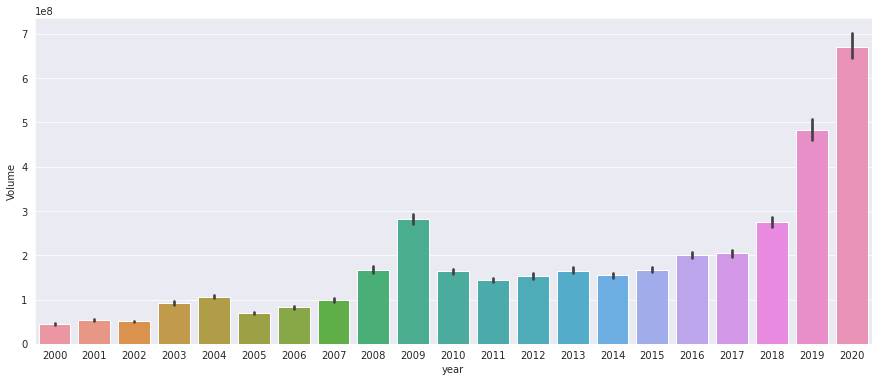

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x='year', y='Volume', data=df_data)

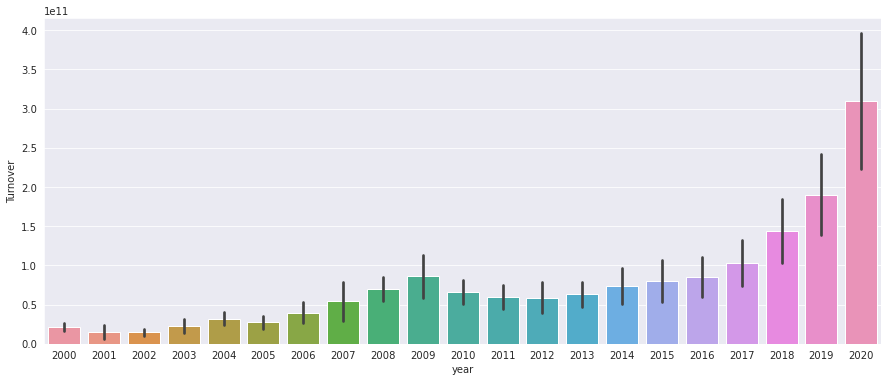

In [28]:
plt.figure(figsize=(15,6))
df= sns.barplot(x="year", y="Turnover", data=df_data,ci="sd")

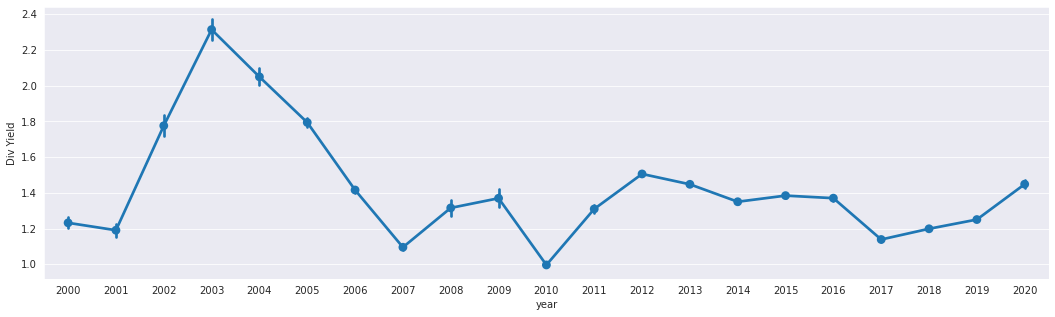

In [29]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='Div Yield', data=df_data)

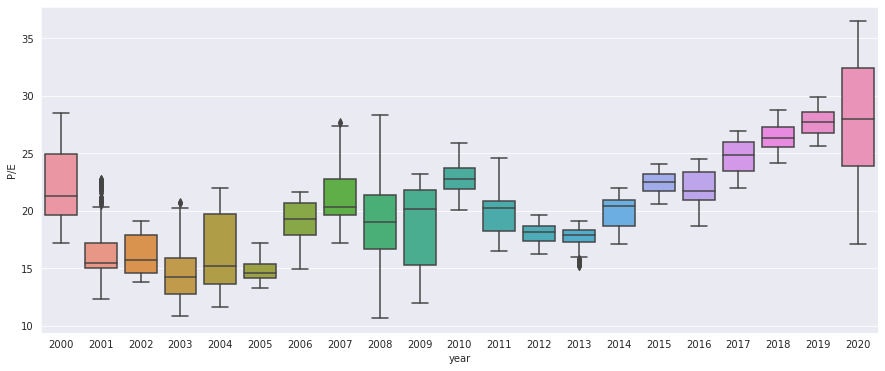

In [30]:
plt.figure(figsize=(15,6))
df = sns.boxplot(x="year", y="P/E", data=df_data)

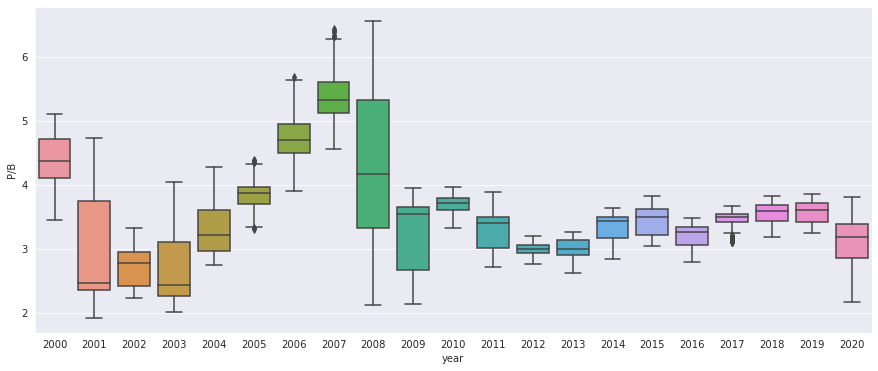

In [31]:
plt.figure(figsize=(15,6))
df = sns.boxplot(x="year", y="P/B", data=df_data)

Let's visualize the Open,High,low,Close (OHLC) data 

In [32]:
df_ohlc=df_data[['Date','Open', 'High','Low', 'Close']]
df_ohlc.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


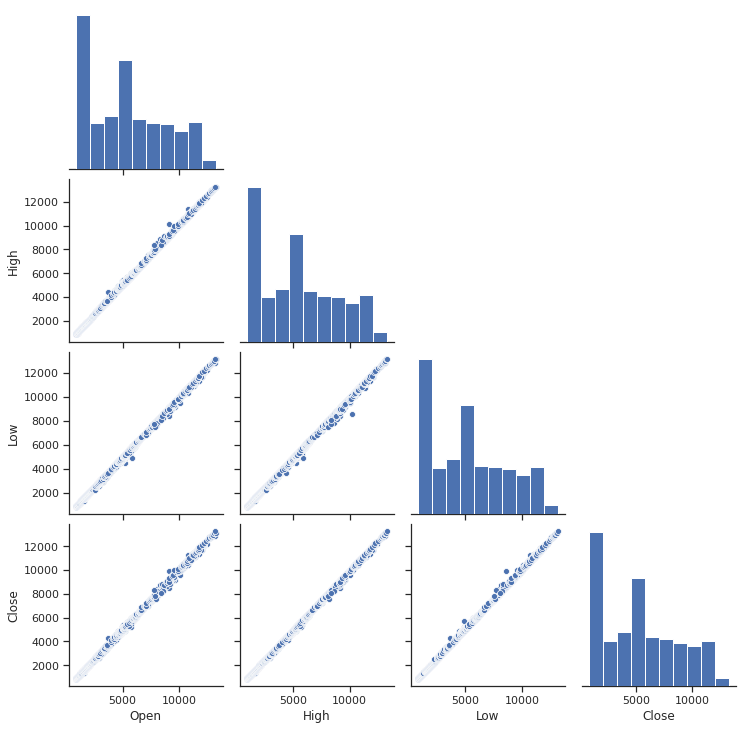

In [33]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
df = sns.pairplot(df_ohlc, corner=True)

In [34]:
df_ohlc.corr()

,Open,High,Low,Close
Open,1.000000,0.999910,0.999875,0.999808
High,0.999910,1.000000,0.999825,0.999907
Low,0.999875,0.999825,1.000000,0.999897
Close,0.999808,0.999907,0.999897,1.000000


This shows that there is very close and linear relation between all the four features (OHLC)

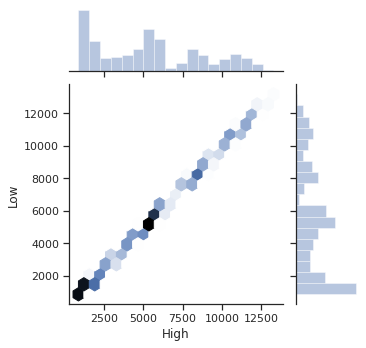

In [35]:
df = sns.jointplot(x="High", y="Low", data=df_data,kind='hex',height=5, ratio=3)

Since all of them shows a linear and close correlation we will just plot High price data over the period of years (2000-2020)

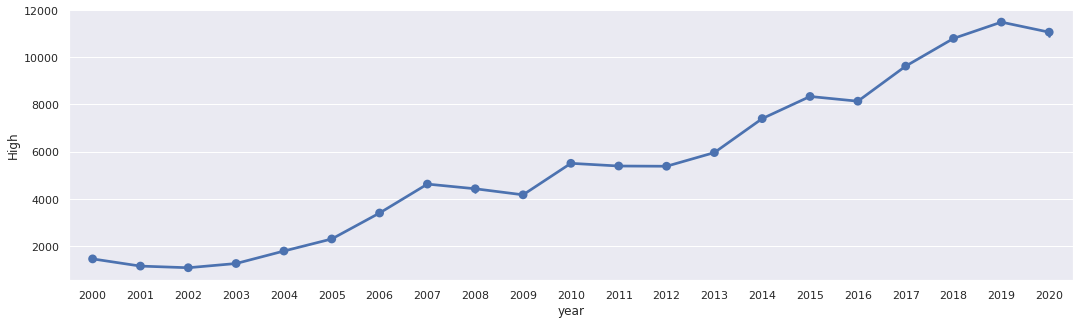

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='High', data=df_data)